# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install scikit-learn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

!pip install imblearn
import pandas as pd
from imblearn.over_sampling import RandomOverSampler  # Import RandomOverSampler


# **Data Loading and Initial Exploration**

In [ ]:
# Read Raw Dataset
#df = pd.read_excel('./dataset/raw_data.xlsx')
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
# The file is an excel file, so pd.read_csv won't work
# Use pd.read_excel instead
df = pd.read_excel('/content/drive/MyDrive/raw_data.xlsx')




Mounted at /content/drive


In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Breast_Cancer.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (4024, 16)


In [ ]:
df


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-n

In [ ]:
print("\nStatistical Summary:")
display(df.describe().T)


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


# **Data Inspection and Understanding**

# **Data Prepration**

In [ ]:
df.shape

(4024, 16)

In [ ]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 1


In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify the changes
print(f'Duplicated values after dropping: {df.duplicated().sum()}')


Duplicated values after dropping: 0


In [ ]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64


In [ ]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", non_numerical_columns)

Numerical Columns: ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

Categorical Columns: ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


In [ ]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Race
Unique Values: ['White' 'Black' 'Other']

Column: Marital Status
Unique Values: ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']

Column: T Stage 
Unique Values: ['T1' 'T2' 'T3' 'T4']

Column: N Stage
Unique Values: ['N1' 'N2' 'N3']

Column: 6th Stage
Unique Values: ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']

Column: differentiate
Unique Values: ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']

Column: Grade
Unique Values: ['3' '2' '1' ' anaplastic; Grade IV']

Column: A Stage
Unique Values: ['Regional' 'Distant']

Column: Estrogen Status
Unique Values: ['Positive' 'Negative']

Column: Progesterone Status
Unique Values: ['Positive' 'Negative']

Column: Status
Unique Values: ['Alive' 'Dead']


In [ ]:
#checking being ibalance of target
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive



Target Variable Distribution:
Status
Alive    3407
Dead      616
Name: count, dtype: int64


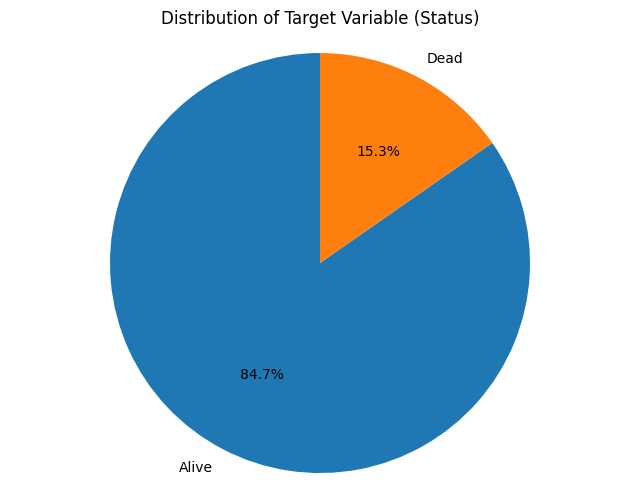


Target variable is imbalanced.


In [ ]:
#checking being ibalance of target
target_counts = df['Status'].value_counts()
print("\nTarget Variable Distribution:")
print(target_counts)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)#target_count: the number of dead or alive patients, autopct:show 1 decimal digit, startangle:the angle for start is 90
plt.title('Distribution of Target Variable (Status)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Check for imbalance (example threshold: 70%)
imbalance_threshold = 0.7 # threshold value for determining class imbalance.
#
#A threshold of 0.7 means that if the proportion of the majority class exceeds 70% of the total samples, the dataset is considered imbalanced.
if target_counts.max() / target_counts.sum() > imbalance_threshold :
    print("\nTarget variable is imbalanced.")
else:
    print("\nTarget variable is balanced or has a mild imbalance.")


In [ ]:
# Replace 'Alive' with 1 and 'Dead' with 0 in the 'Status' column
df['Status'] = df['Status'].replace({'Alive': 1, 'Dead': 0})

# Display the updated DataFrame to verify the changes
#print(df.head())
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,1
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,1
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,1
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,1
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,1
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,1


In [ ]:

# Count the occurrences of 0 and 1 in the 'Status' column
status_counts = df['Status'].value_counts()

# Print the counts
print("\nNumber of 0s and 1s in 'Status' column:")
status_counts



Number of 0s and 1s in 'Status' column:


,count
Status,
1,3407
0,616


# **Exploratory Data Analysis (EDA)**

# numerical data

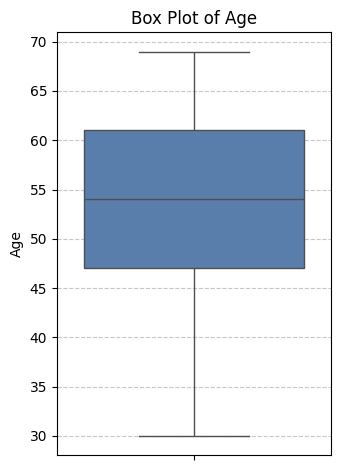

In [ ]:
# Box plot for 'Age'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'], color='#4c7cba')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate statistics for the 'Age' column
age_stats = df['Tumor Size'].describe()
age_median = df['Tumor Size'].median()
age_std = df['Age'].std()
age_min = df['Age'].min()
age_max = df['Age'].max()

print("Statistics for the 'Age' column:")
print(f"Mean: {age_stats['mean']}")
print(f"Median: {age_median}")
print(f"Standard Deviation: {age_std}")
print(f"Minimum: {age_min}")
print(f"Maximum: {age_max}")

Statistics for the 'Age' column:
Mean: 30.477007208550834
Median: 25.0
Standard Deviation: 8.963117984662984
Minimum: 30
Maximum: 69


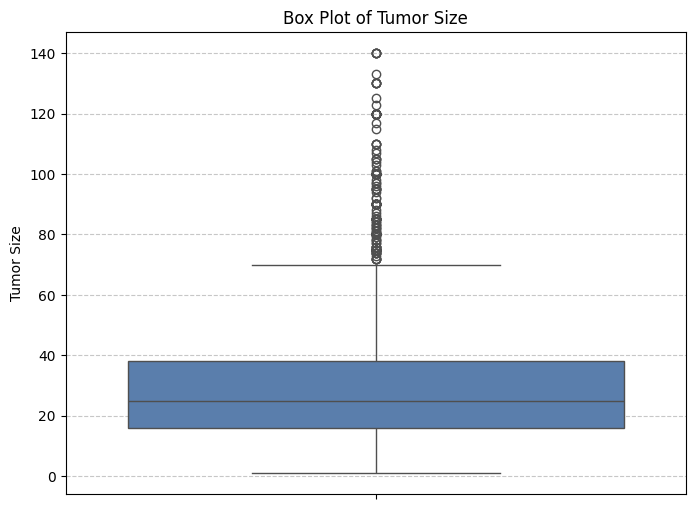

In [ ]:
# Box plot for 'Tumor Size'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(y=df['Tumor Size'], color='#4c7cba')
plt.title('Box Plot of Tumor Size')
plt.ylabel('Tumor Size')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Calculate statistics for 'Tumor Size'
tumor_size_stats = df['Tumor Size'].describe()
tumor_size_median = df['Tumor Size'].median()
tumor_size_mode = df['Tumor Size'].mode()[0]  # Get the first mode if multiple exist

print("Tumor Size Statistics:")
print(tumor_size_stats)
print(f"Median: {tumor_size_median}")
print(f"Mode: {tumor_size_mode}")


Tumor Size Statistics:
count    4023.000000
mean       30.477007
std        21.121253
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64
Median: 25.0
Mode: 15


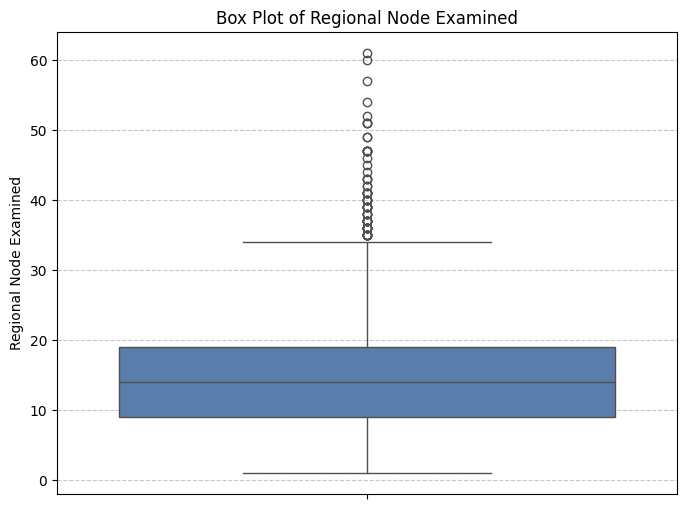

In [ ]:
# Box plot for 'Regional Node Examined'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(y=df['Regional Node Examined'], color='#4c7cba')
plt.title('Box Plot of Regional Node Examined')
plt.ylabel('Regional Node Examined')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Calculate statistics for 'Regional Node Examined'
regional_node_stats = df['Regional Node Examined'].describe()
regional_node_median = df['Regional Node Examined'].median()
regional_node_mode = df['Regional Node Examined'].mode()[0]  # Get the first mode if multiple exist
regional_node_std = df['Regional Node Examined'].std()
regional_node_min = df['Regional Node Examined'].min()
regional_node_max = df['Regional Node Examined'].max()


print("\nRegional Node Examined Statistics:")
print(regional_node_stats)
print(f"Median: {regional_node_median}")
print(f"Mode: {regional_node_mode}")
print(f"Standard Deviation: {regional_node_std}")
print(f"Minimum: {regional_node_min}")
print(f"Maximum: {regional_node_max}")



Regional Node Examined Statistics:
count    4023.000000
mean       14.358439
std         8.100241
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        61.000000
Name: Regional Node Examined, dtype: float64
Median: 14.0
Mode: 13
Standard Deviation: 8.100241123863945
Minimum: 1
Maximum: 61


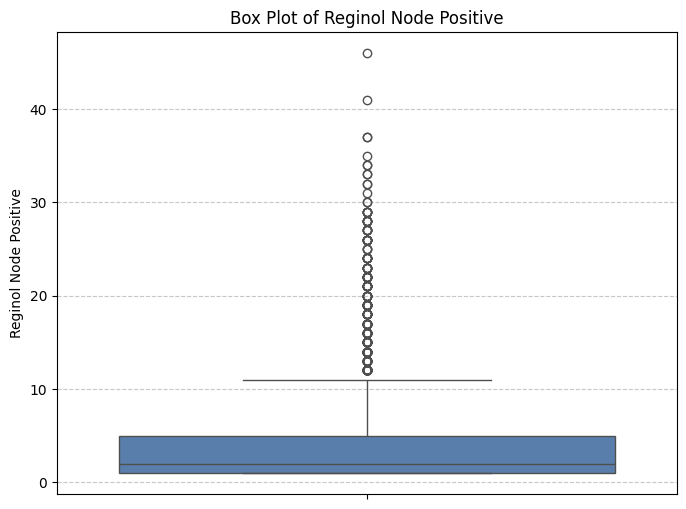

In [ ]:
# Box plot for 'Reginol Node Positive'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(y=df['Reginol Node Positive'], color='#4c7cba')
plt.title('Box Plot of Reginol Node Positive')
plt.ylabel('Reginol Node Positive')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calculate statistics for 'Reginol Node Positive'
regional_node_positive_stats = df['Reginol Node Positive'].describe()
regional_node_positive_median = df['Reginol Node Positive'].median()
regional_node_positive_mode = df['Reginol Node Positive'].mode()[0]
regional_node_positive_std = df['Reginol Node Positive'].std()
regional_node_positive_min = df['Reginol Node Positive'].min()
regional_node_positive_max = df['Reginol Node Positive'].max()

print("\nReginol Node Positive Statistics:")
print(regional_node_positive_stats)
print(f"Median: {regional_node_positive_median}")
print(f"Mode: {regional_node_positive_mode}")
print(f"Standard Deviation: {regional_node_positive_std}")
print(f"Minimum: {regional_node_positive_min}")
print(f"Maximum: {regional_node_positive_max}")



Reginol Node Positive Statistics:
count    4023.000000
mean        4.158837
std         5.109724
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        46.000000
Name: Reginol Node Positive, dtype: float64
Median: 2.0
Mode: 1
Standard Deviation: 5.109723556844782
Minimum: 1
Maximum: 46


In [ ]:
# Calculate statistics for 'Survival Months'
survival_months_stats = df['Survival Months'].describe()
survival_months_median = df['Survival Months'].median()
survival_months_mode = df['Survival Months'].mode()[0]
survival_months_std = df['Survival Months'].std()
survival_months_min = df['Survival Months'].min()
survival_months_max = df['Survival Months'].max()

print("\nSurvival Months Statistics:")
print(survival_months_stats)
print(f"Median: {survival_months_median}")
print(f"Mode: {survival_months_mode}")
print(f"Standard Deviation: {survival_months_std}")
print(f"Minimum: {survival_months_min}")
print(f"Maximum: {survival_months_max}")



Survival Months Statistics:
count    4023.000000
mean       71.301765
std        22.923009
min         1.000000
25%        56.000000
50%        73.000000
75%        90.000000
max       107.000000
Name: Survival Months, dtype: float64
Median: 73.0
Mode: 69
Standard Deviation: 22.92300940943985
Minimum: 1
Maximum: 107


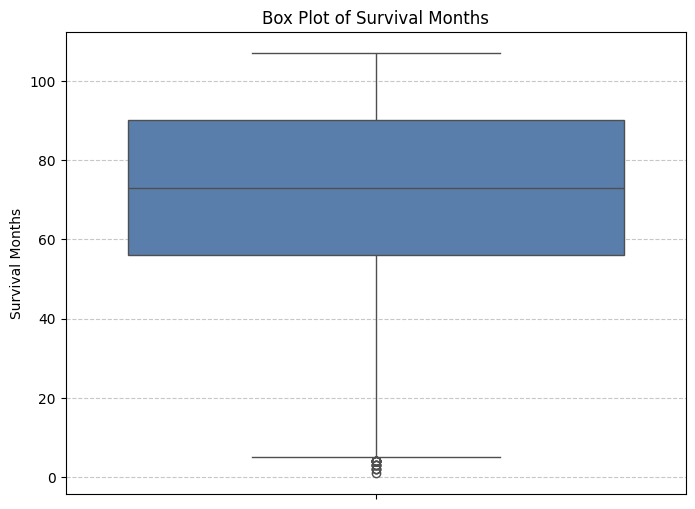

In [ ]:
# Box plot for 'Survival Months'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(y=df['Survival Months'], color='#4c7cba')
plt.title('Box Plot of Survival Months')
plt.ylabel('Survival Months')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.show()

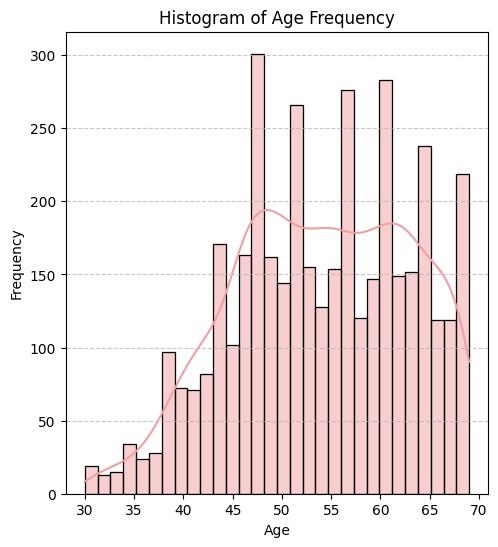

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for 'Age'
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, color='#f1a0a1', kde=True)
plt.title('Histogram of Age Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)


In [ ]:
from scipy.stats import shapiro
#shapiro-wilk test to verify normalization histo

stat, p_value = shapiro(df["Age"])

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value > 0.05:
    print("AGE data has a normal distribution.")
else:
    print("AGE data are not normal, the use of nonparametric tests is recommended.")


Shapiro-Wilk Test Statistic: 0.9759
P-value: 1.4458e-25
AGE data are not normal, the use of nonparametric tests is recommended.


In [ ]:
from scipy.stats import mannwhitneyu
# dividing to 2 groups
# Correct the filtering condition to use 0 and 1
age_cancer = df[df["Status"] == 0]["Age"]  # Use 0 for "Dead"
age_no_cancer = df[df["Status"] == 1]["Age"]  # Use 1 for "Alive"

# Mann-Whitney U
stat, p_value = mannwhitneyu(age_cancer, age_no_cancer, alternative="two-sided")

stat, p_value

(np.float64(1154659.0), np.float64(7.142455818624171e-05))

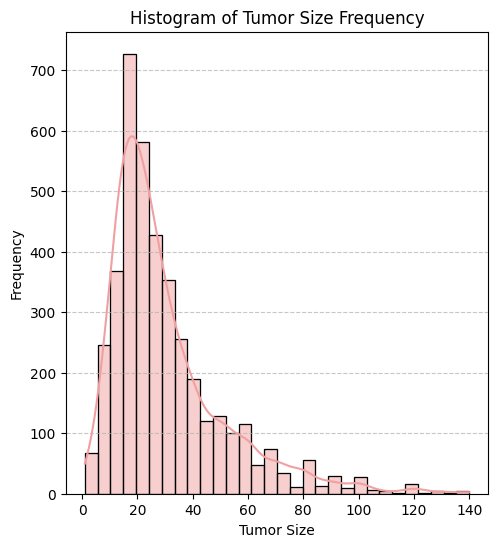

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for 'Tumor Size'
plt.subplot(1, 2, 1)
sns.histplot(df['Tumor Size'], bins=30, color='#f1a0a1', kde=True)
plt.title('Histogram of Tumor Size Frequency')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

In [ ]:
from scipy.stats import shapiro
#shapiro-wilk test to verify naomalization histo
stat, p_value = shapiro(df["Tumor Size"])

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value > 0.05:
    print("Tumor Size data has a normal distribution.")
else:
    print("Tumor Size data are not normal, the use of nonparametric tests is recommended.")

Shapiro-Wilk Test Statistic: 0.8414
P-value: 4.2930e-53
Tumor Size data are not normal, the use of nonparametric tests is recommended.


In [ ]:
from scipy.stats import mannwhitneyu
# dividing to 2 groups
# Correct the filtering condition to use 0 and 1
Tumor_Size_cancer = df[df["Status"] == 0]["Tumor Size"]  # Use 0 for "Dead"
Tumor_Size_no_cancer = df[df["Status"] == 1]["Tumor Size"]  # Use 1 for "Alive"

# Mann-Whitney U
stat, p_value = mannwhitneyu(Tumor_Size_cancer, Tumor_Size_no_cancer, alternative="two-sided")

stat, p_value

(np.float64(1285572.5), np.float64(5.098613377306891e-19))

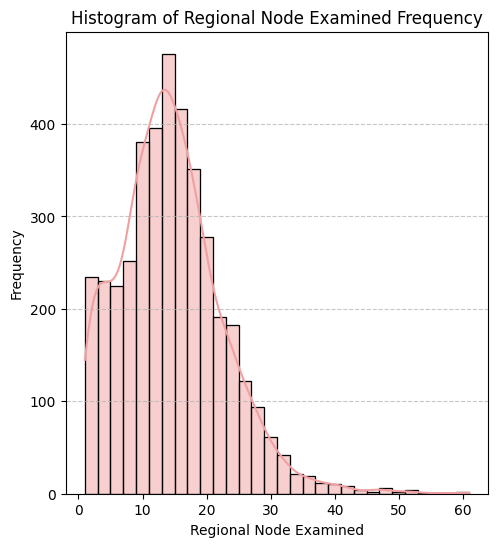

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for 'Regional Node Examined'
plt.subplot(1, 2, 1)
sns.histplot(df['Regional Node Examined'], bins=30, color='#f1a0a1', kde=True)
plt.title('Histogram of Regional Node Examined Frequency')
plt.xlabel('Regional Node Examined')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

In [ ]:
from scipy.stats import shapiro
#shapiro-wilk test to verify naomalization histo

stat, p_value = shapiro(df["Regional Node Examined"])

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value > 0.05:
    print("Regional Node Examined data has a normal distribution.")
else:
    print("Regional Node Examined data are not normal, the use of nonparametric tests is recommended.")

Shapiro-Wilk Test Statistic: 0.9600
P-value: 5.9260e-32
Regional Node Examined data are not normal, the use of nonparametric tests is recommended.


In [ ]:
#Regional Node Examined
from scipy.stats import mannwhitneyu

# dividing to 2 groups
# Use 0 and 1 instead of "Dead" and "Alive"
Regional_Node_Examined_cancer = df[df["Status"] == 0]["Regional Node Examined"]  # Use 0 for "Dead"
Regional_Node_Examined_no_cancer = df[df["Status"] == 1]["Regional Node Examined"]  # Use 1 for "Alive"


# Mann-Whitney U
stat, p_value = mannwhitneyu(Regional_Node_Examined_cancer, Regional_Node_Examined_no_cancer, alternative="two-sided")

stat, p_value

(np.float64(1097707.0), np.float64(0.06813616488912727))

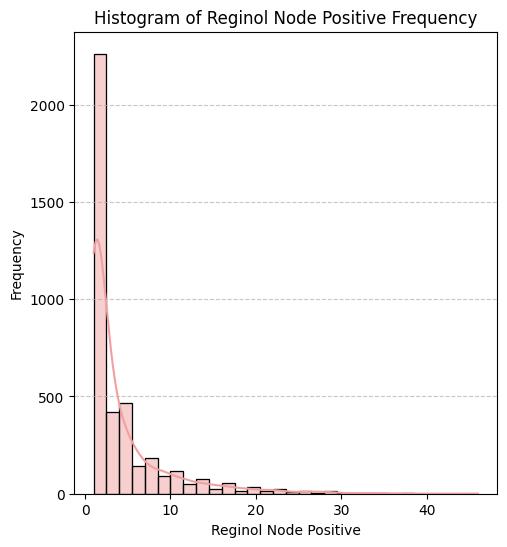

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for 'Regional Node positive'
plt.subplot(1, 2, 1)
sns.histplot(df['Reginol Node Positive'], bins=30, color='#f1a0a1', kde=True)
plt.title('Histogram of Reginol Node Positive Frequency')
plt.xlabel('Reginol Node Positive')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

In [ ]:
from scipy.stats import shapiro
#shapiro-wilk test to verify naomalization histo

stat, p_value = shapiro(df["Reginol Node Positive"])

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value > 0.05:
    print("Regional Node Positive data has a normal distribution.")
else:
    print("Regional Node Positive data are not normal, the use of nonparametric tests is recommended.")

Shapiro-Wilk Test Statistic: 0.6532
P-value: 1.3568e-67
Regional Node Positive data are not normal, the use of nonparametric tests is recommended.


In [ ]:
#Regional Node Positive
from scipy.stats import mannwhitneyu

# dividing to 2 groups
# Use 0 and 1 for 'Status' instead of "Dead" and "Alive"
Reginol_Node_Positive_cancer = df[df["Status"] == 0]["Reginol Node Positive"]  # Use 0 for "Dead"
Reginol_Node_Positive_no_cancer = df[df["Status"] == 1]["Reginol Node Positive"]  # Use 1 for "Alive"

# Mann-Whitney U
stat, p_value = mannwhitneyu(Reginol_Node_Positive_cancer, Reginol_Node_Positive_no_cancer, alternative="two-sided")

stat, p_value

(np.float64(1406220.0), np.float64(7.410171031617212e-44))

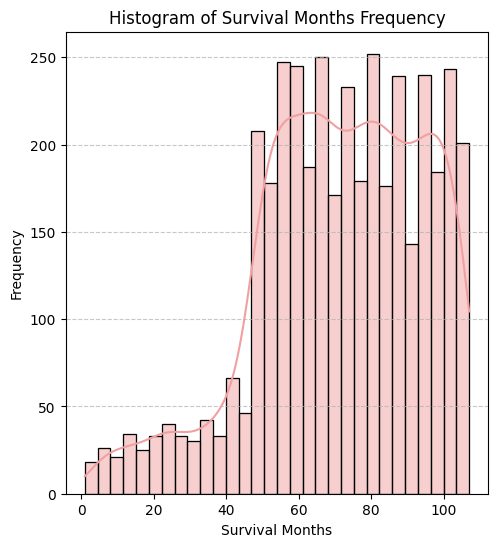

In [ ]:

plt.figure(figsize=(12, 6))

# Histogram for 'Survival Months'
plt.subplot(1, 2, 1)
sns.histplot(df['Survival Months'], bins=30, color='#f1a0a1', kde=True)
plt.title('Histogram of Survival Months Frequency')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

In [ ]:
from scipy.stats import shapiro
#shapiro-wilk test to verify naomalization histo

stat, p_value = shapiro(df["Survival Months"])

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value > 0.05:
    print("Survival Months data has a normal distribution.")
else:
    print("Survival Months data are not normal, the use of nonparametric tests is recommended.")

Shapiro-Wilk Test Statistic: 0.9624
P-value: 3.9432e-31
Survival Months data are not normal, the use of nonparametric tests is recommended.


In [ ]:
#Regional Node Positive
from scipy.stats import mannwhitneyu

# dividing to 2 groups
# Use 0 and 1 for 'Status' instead of "Dead" and "Alive"
Survival_Months_cancer = df[df["Status"] == 0]["Survival Months"]  # Use 0 for "Dead"
Surviva_lMonths_no_cancer = df[df["Status"] == 1]["Survival Months"]  # Use 1 for "Alive"

# Mann-Whitney U
stat, p_value = mannwhitneyu(Survival_Months_cancer, Surviva_lMonths_no_cancer, alternative="two-sided")

stat, p_value

(np.float64(350417.0), np.float64(5.236125538641806e-153))

# categorical data

<Figure size 1000x600 with 0 Axes>

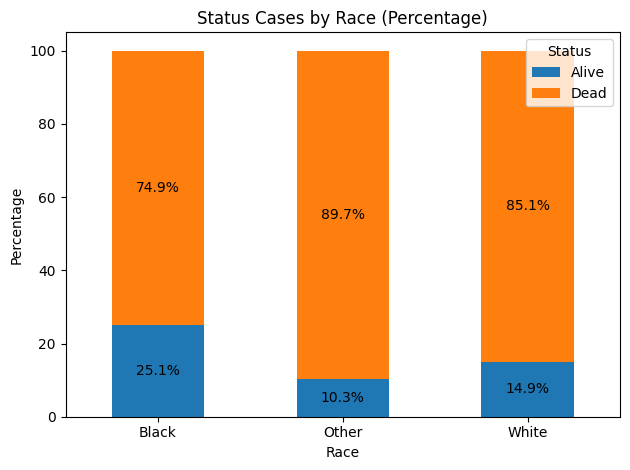

In [ ]:
# Calculate the percentage of dead and alive for each race
race_status_counts = df.groupby('Race')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
race_status_counts.plot(kind='bar', stacked=True)
plt.title('Status Cases by Race (Percentage)')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Alive', 'Dead'])


# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Race'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between Race and Status.")
else:
    print("There is no statistically significant association between Race and Status.")

Chi-square statistic: 27.955796200731324
P-value: 8.501116863688421e-07
Degrees of freedom: 2
Expected frequencies:
 [[  44.55779269  246.44220731]
 [  48.99826     271.00174   ]
 [ 522.4439473  2889.5560527 ]]
There is a statistically significant association between Race and Status.


<Figure size 1000x600 with 0 Axes>

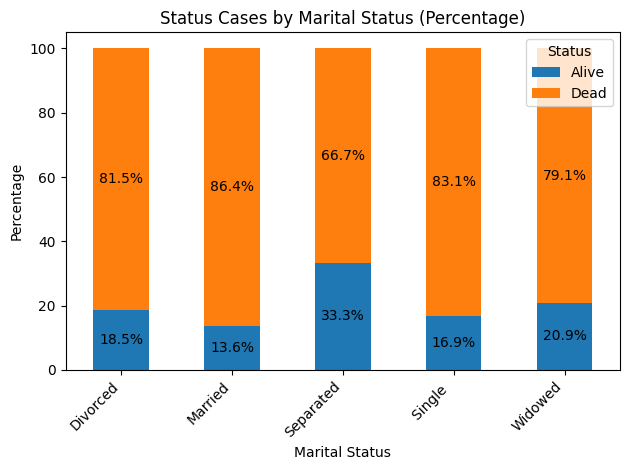

Chi-square statistic: 28.218840353728687
P-value: 1.1261713457209616e-05
Degrees of freedom: 4
Expected frequencies:
 [[  74.41610738  411.58389262]
 [ 404.54188417 2237.45811583]
 [   6.89038031   38.10961969]
 [  94.16853095  520.83146905]
 [  35.98309719  199.01690281]]
There is a statistically significant association between Marital Status and Status.


In [ ]:
# Calculate the percentage of dead and alive for each marital status
marital_status_counts = df.groupby('Marital Status')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar', stacked=True)
plt.title('Status Cases by Marital Status (Percentage)')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

# Perform Chi-square test
contingency_table = pd.crosstab(df['Marital Status'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between Marital Status and Status.")
else:
    print("There is no statistically significant association between Marital Status and Status.")


In [ ]:
contingency_table = pd.crosstab(df['Marital Status'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between Marital Status and Status.")
else:
    print("There is no statistically significant association between Marital Status and Status.")


Chi-square statistic: 28.218840353728687
P-value: 1.1261713457209616e-05
Degrees of freedom: 4
Expected frequencies:
 [[  74.41610738  411.58389262]
 [ 404.54188417 2237.45811583]
 [   6.89038031   38.10961969]
 [  94.16853095  520.83146905]
 [  35.98309719  199.01690281]]
There is a statistically significant association between Marital Status and Status.


<Figure size 1000x600 with 0 Axes>

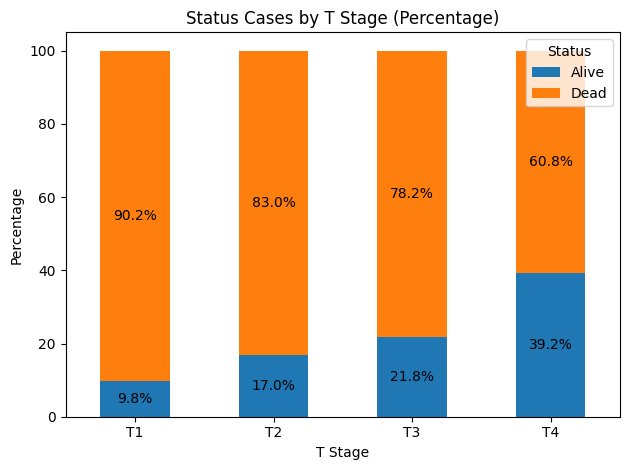

In [ ]:
# Calculate the percentage of dead and alive for each T Stage
t_stage_status_counts = df.groupby('T Stage ')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
t_stage_status_counts.plot(kind='bar', stacked=True)
plt.title('Status Cases by T Stage (Percentage)')
plt.xlabel('T Stage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()


In [ ]:
contingency_table = pd.crosstab(df['T Stage '], df['Status']) # Add a space after 'T Stage'
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between T Stage and Status.")
else:
    print("There is no statistically significant association between T Stage  and Status.")


Chi-square statistic: 103.34850293272454
P-value: 2.9606888213998393e-22
Degrees of freedom: 3
Expected frequencies:
 [[ 245.29753915 1356.70246085]
 [ 273.47153865 1512.52846135]
 [  81.61272682  451.38727318]
 [  15.61819538   86.38180462]]
There is a statistically significant association between T Stage and Status.


<Figure size 1000x600 with 0 Axes>

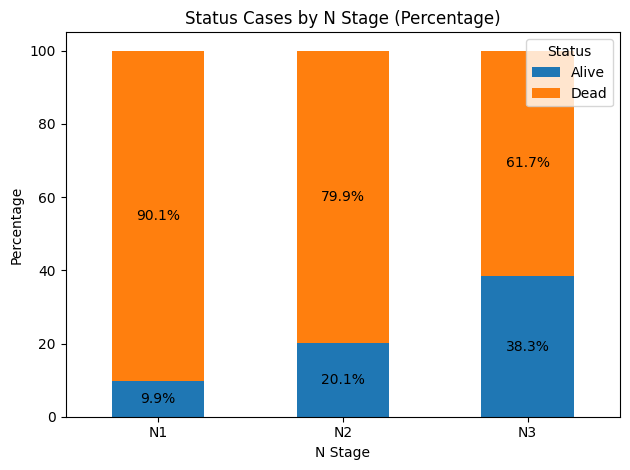

Chi-square statistic: 269.7687770258287
P-value: 2.6330213095349526e-59
Degrees of freedom: 2
Expected frequencies:
 [[ 418.16952523 2312.83047477]
 [ 125.55804126  694.44195874]
 [  72.27243351  399.72756649]]
There is a statistically significant association between N Stage and Status.


In [ ]:
# Calculate the percentage of dead and alive for each N Stage
n_stage_status_counts = df.groupby('N Stage')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
n_stage_status_counts.plot(kind='bar', stacked=True)
plt.title('Status Cases by N Stage (Percentage)')
plt.xlabel('N Stage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

# Perform Chi-square test
contingency_table = pd.crosstab(df['N Stage'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between N Stage and Status.")
else:
    print("There is no statistically significant association between N Stage and Status.")


In [ ]:
contingency_table = pd.crosstab(df['N Stage'], df['Status']) # Add a space after 'N Stage'
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between N Stage and Status.")
else:
    print("There is no statistically significant association between N Stage and Status.")


Chi-square statistic: 269.7687770258287
P-value: 2.6330213095349526e-59
Degrees of freedom: 2
Expected frequencies:
 [[ 418.16952523 2312.83047477]
 [ 125.55804126  694.44195874]
 [  72.27243351  399.72756649]]
There is a statistically significant association between N Stage and Status.


<Figure size 1000x600 with 0 Axes>

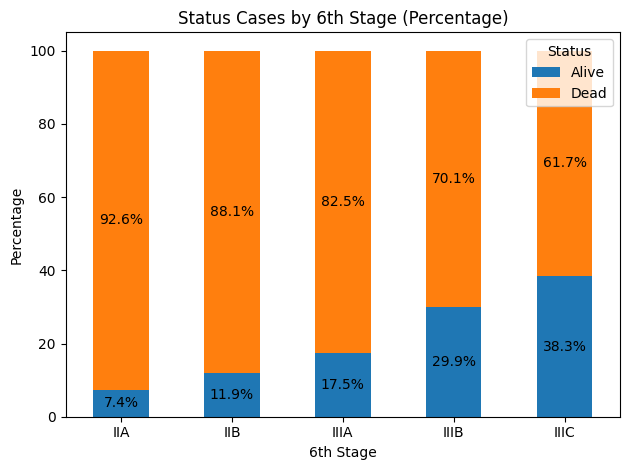

In [ ]:
# Calculate the percentage of dead and alive for each 6th Stage
sixth_stage_status_counts = df.groupby('6th Stage')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
sixth_stage_status_counts.plot(kind='bar', stacked=True)
plt.title('Status Cases by 6th Stage (Percentage)')
plt.xlabel('6th Stage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()


In [ ]:
contingency_table = pd.crosstab(df['6th Stage'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between 6th Stage and Status.")
else:
    print("There is no statistically significant association between 6th Stage and Status.")

Chi-square statistic: 281.4521067398814
P-value: 1.0836804907970138e-59
Degrees of freedom: 4
Expected frequencies:
 [[ 199.66790952 1104.33209048]
 [ 173.02510564  956.97489436]
 [ 160.77554064  889.22445936]
 [  10.25901069   56.74098931]
 [  72.27243351  399.72756649]]
There is a statistically significant association between 6th Stage and Status.


<Figure size 1000x600 with 0 Axes>

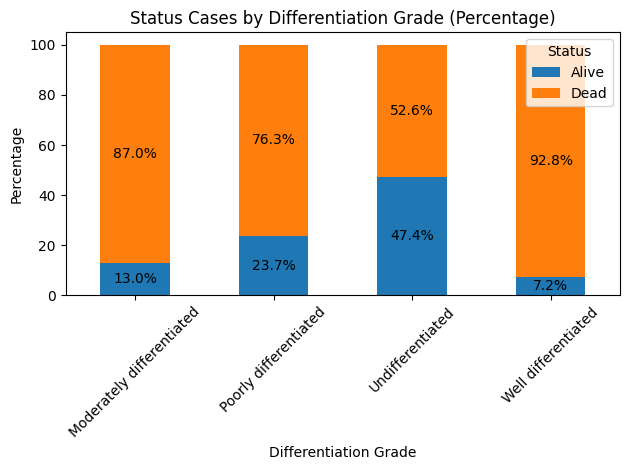

In [ ]:
# Calculate the percentage of dead and alive for each differentiation grade
differentiation_status_counts = df.groupby('differentiate')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
differentiation_status_counts.plot(kind='bar', stacked=True)
plt.title('Status Cases by Differentiation Grade (Percentage)')
plt.xlabel('Differentiation Grade')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center') # fixed ha and va

plt.tight_layout()
plt.show()

In [ ]:
contingency_table = pd.crosstab(df['differentiate'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between differentiate and Status.")
else:
    print("There is no statistically significant association between differentiate and Status.")

Chi-square statistic: 112.48244703832785
P-value: 3.2065660565739928e-24
Degrees of freedom: 3
Expected frequencies:
 [[ 359.83097191 1990.16902809]
 [ 170.11583395  940.88416605]
 [   2.90927169   16.09072831]
 [  83.14392245  459.85607755]]
There is a statistically significant association between differentiate and Status.


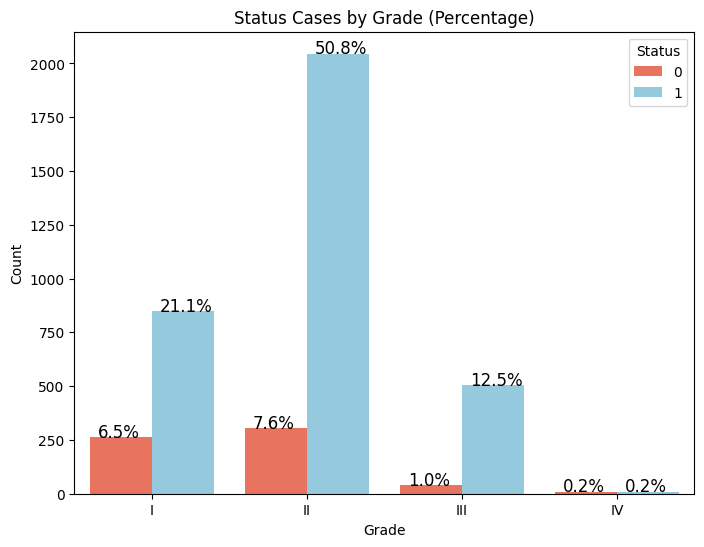

In [ ]:
custom_palette = {1: '#87CEEB', 0: '#FF6347'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Grade', hue='Status', data=df, palette=custom_palette)
plt.title('Status Cases by Grade (Percentage)')
plt.xlabel('Grade')
plt.ylabel('Count')

# Calculate percentages and annotate bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid division by zero if height is 0
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])  # Total for the current grade
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2 - 0.15
        y = p.get_y() + height
        ax.annotate(percentage, (x, y), size=12)

# Set x-axis tick labels to original grade values
ax.set_xticklabels(['I', 'II', 'III', 'IV'])

plt.show()

In [ ]:
contingency_table = pd.crosstab(df['Grade'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between Grade and Status.")
else:
    print("There is no statistically significant association between Grade and Status.")

Chi-square statistic: 112.48244703832785
P-value: 3.2065660565739928e-24
Degrees of freedom: 3
Expected frequencies:
 [[   2.90927169   16.09072831]
 [  83.14392245  459.85607755]
 [ 359.83097191 1990.16902809]
 [ 170.11583395  940.88416605]]
There is a statistically significant association between Grade and Status.


<Figure size 1000x600 with 0 Axes>

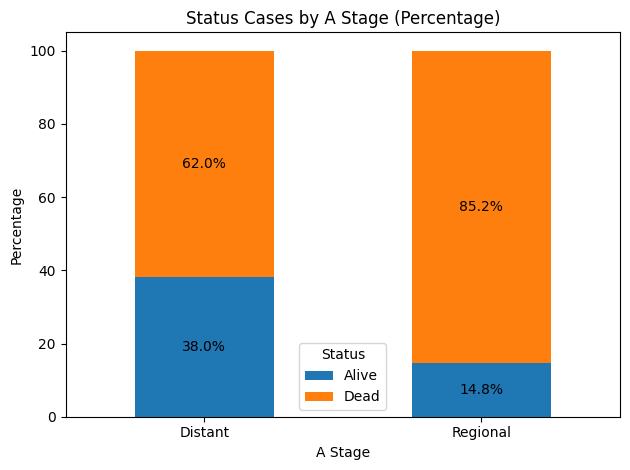

Chi-square statistic: 35.74539187108769
P-value: 2.248632172743437e-09
Degrees of freedom: 1
Expected frequencies:
 [[  14.08699975   77.91300025]
 [ 601.91300025 3329.08699975]]
There is a statistically significant association between A Stage and Status.


In [ ]:
# Calculate the percentage of dead and alive for each A Stage
a_stage_status_counts = df.groupby('A Stage')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
a_stage_status_counts.plot(kind='bar', stacked=True)
plt.title('Status Cases by A Stage (Percentage)')
plt.xlabel('A Stage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

# Perform Chi-square test
contingency_table = pd.crosstab(df['A Stage'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between A Stage and Status.")
else:
    print("There is no statistically significant association between A Stage and Status.")


In [ ]:
contingency_table = pd.crosstab(df['A Stage'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between A Stage and Status.")
else:
    print("There is no statistically significant association between A Stage and Status.")


Chi-square statistic: 35.74539187108769
P-value: 2.248632172743437e-09
Degrees of freedom: 1
Expected frequencies:
 [[  14.08699975   77.91300025]
 [ 601.91300025 3329.08699975]]
There is a statistically significant association between A Stage and Status.


<Figure size 1000x600 with 0 Axes>

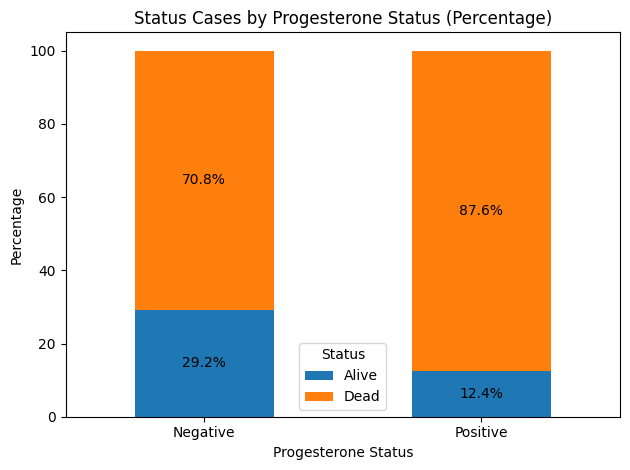

Chi-square statistic: 124.79785702369541
P-value: 5.635251309080469e-29
Degrees of freedom: 1
Expected frequencies:
 [[ 106.87745464  591.12254536]
 [ 509.12254536 2815.87745464]]
There is a statistically significant association between Progesterone Status and Status.


In [ ]:
# Calculate the percentage of dead and alive for each Progesterone Status
progesterone_status_counts = df.groupby('Progesterone Status')['Status'].value_counts(normalize=True).unstack() * 100

# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
ax = progesterone_status_counts.plot(kind='bar', stacked=True) # store axis object
plt.title('Status Cases by Progesterone Status (Percentage)')
plt.xlabel('Progesterone Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()

# Map x-axis labels back to original values
# Assuming 1 corresponds to "Negative" and 2 to "Positive"
ax.set_xticklabels(['Negative', 'Positive']) # update xticklabels
plt.show()

# Perform Chi-square test
contingency_table = pd.crosstab(df['Progesterone Status'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between Progesterone Status and Status.")
else:
    print("There is no statistically significant association between Progesterone Status and Status.")

<Figure size 1000x600 with 0 Axes>

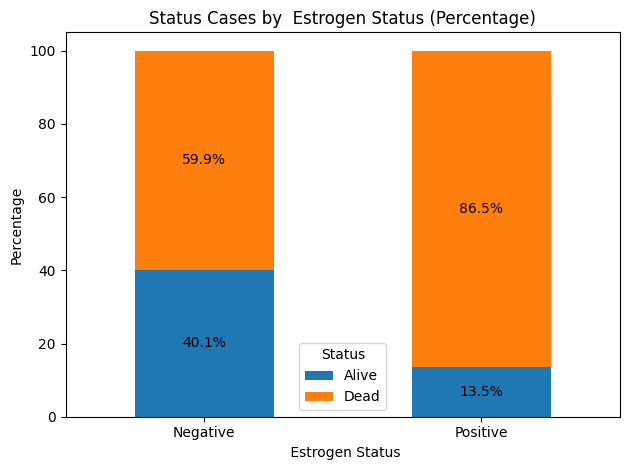

Chi-square statistic: 135.08892079703872
P-value: 3.1570852794390568e-31
Degrees of freedom: 1
Expected frequencies:
 [[  41.18916232  227.81083768]
 [ 574.81083768 3179.18916232]]
There is a statistically significant association between Estrogen Status and Status.


In [ ]:
# Calculate the percentage of dead and alive for each Progesterone Status
Estrogen_status_counts = df.groupby('Estrogen Status')['Status'].value_counts(normalize=True).unstack() * 100
# Create the bar chart with percentages
plt.figure(figsize=(10, 6))
ax = Estrogen_status_counts.plot(kind='bar', stacked=True) # store axis object
plt.title('Status Cases by  Estrogen Status (Percentage)')
plt.xlabel(' Estrogen Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Alive', 'Dead'])

# Annotate the bars with percentages
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()

# Map x-axis labels back to original values
# Assuming 1 corresponds to "Negative" and 2 to "Positive"
ax.set_xticklabels(['Negative', 'Positive']) # update xticklabels
plt.show()

# Perform Chi-square test
contingency_table = pd.crosstab(df['Estrogen Status'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between Estrogen Status and Status.")
else:
    print("There is no statistically significant association between Estrogen Status and Status.")

# **Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Identify outliers in numerical features (for analysis only)
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numerical_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

for col in numerical_cols:
    outliers = find_outliers_iqr(df[col])
    num_outliers = len(outliers)
    print(f"Outliers in {col}: {num_outliers}")
    print(f"Outlier Values in {col}:\n{outliers}\n")


Outliers in Age: 0
Outlier Values in Age:
Series([], Name: Age, dtype: int64)

Outliers in Tumor Size: 222
Outlier Values in Tumor Size:
8       103
52      120
53       77
63       75
70      130
       ... 
3930    120
3965    140
3991     90
4009    100
4012     80
Name: Tumor Size, Length: 222, dtype: int64

Outliers in Regional Node Examined: 72
Outlier Values in Regional Node Examined:
57      49
227     42
289     41
290     39
303     46
        ..
3893    40
3923    36
3950    60
3957    37
3990    39
Name: Regional Node Examined, Length: 72, dtype: int64

Outliers in Reginol Node Positive: 344
Outlier Values in Reginol Node Positive:
8       18
9       12
14      14
24      22
25      17
        ..
3974    13
3985    19
3992    19
3995    14
4012    12
Name: Reginol Node Positive, Length: 344, dtype: int64

Outliers in Survival Months: 18
Outlier Values in Survival Months:
414     3
679     4
721     3
896     4
921     1
928     3
1042    4
1156    2
1702    4
1709    3
1731

In [ ]:
#encoding
def encode_race(race):
    race_mapping = {
        'White': [1, 0, 0, 0],
        'Black': [0, 1, 0, 0],
        'Other': [0, 0, 1, 0],
                   }
    return race_mapping.get(race, [0, 0, 0, 1]) # Default to [0,0,0,1] for unknown

# Apply one-hot encoding
encoded_races = df['Race'].apply(encode_race).tolist()
race_df = pd.DataFrame(encoded_races, columns=['Race_White', 'Race_Black', 'Race_Other', 'Race_Unknown'])
df = pd.concat([df, race_df], axis=1).drop('Race', axis=1)


In [ ]:
#encodeing
def encode_marital_status(status):
    mapping = {
        'Married': [1, 0, 0, 0, 0],
        'Widowed': [0, 1, 0, 0, 0],
        'Single': [0, 0, 1, 0, 0],
        'Sepparated': [0, 0, 0, 1, 0],
        'Divorced': [0, 0, 0, 0, 1],
    }
    return mapping.get(status, [0, 0, 0, 0, 0])  # Default to all zeros for unknown

# Apply one-hot encoding
encoded_marital_status = df['Marital Status'].apply(encode_marital_status).tolist()

# Create new columns in the DataFrame
for i in range(5):
    df[f'Marital_Status_{i+1}'] = [row[i] for row in encoded_marital_status]

# Drop the original 'Marital Status' column
df = df.drop('Marital Status', axis=1)


In [ ]:
#encodeing
def encode_t_stage(stage):
    if stage == 'T1':
        return 1
    elif stage == 'T2':
        return 2
    elif stage == 'T3':
        return 3
    else:
        return 0  # Handle unknown values

df['T Stage '] = df['T Stage '].apply(encode_t_stage)


In [ ]:
#encoding
def encode_n_stage(stage):
    if stage == 'N1':
        return 1
    elif stage == 'N2':
        return 2
    elif stage == 'N3':
        return 3
    else:
        return 0  # Handle unknown values

df['N Stage'] = df['N Stage'].apply(encode_n_stage)

In [ ]:
def encode_6th_stage(stage):
    if stage == 'IIA':
        return 1
    elif stage == 'IIB':
        return 2
    elif stage == 'IIIA':
        return 3
    elif stage == 'IIIB':
        return 4
    elif stage == 'IIIC':
        return 5
    else:
        return 0  # Handle unknown values

df['6th Stage'] = df['6th Stage'].apply(encode_6th_stage)


In [ ]:
#encoding
def encode_differentiate(diff):
    if diff == 'Well differentiated':
        return 1
    elif diff == 'Moderately differentiated':
        return 2
    elif diff == 'Poorly differentiated':
        return 3
    elif diff == 'Undifferentiated':
        return 4
    else:
        return 0  # Handle unknown values

df['differentiate'] = df['differentiate'].apply(encode_differentiate)


Grade', 'A Stage', 'Progesterone Status'
i need to encode my categorical features one by one.  please encode by order differentiate  from Well differentiated, Moderately differentiated, Poorly differentiated	, Undifferentiated TO 1,2,3,4

In [ ]:
def encode_grade(grade):
    if grade == 'I':
        return 1
    elif grade == 'II':
        return 2
    elif grade == 'III':
        return 3
    elif grade == 'IV':
        return 4
    else:
        return 0  # Handle unknown values

df['Grade'] = df['Grade'].apply(encode_grade)


In [ ]:
#encoding
def encode_a_stage(stage):
    if stage == 'Distant':
        return 1
    elif stage == 'Regional':
        return 2
    else:
        return 0  # Handle unknown values

df['A Stage'] = df['A Stage'].apply(encode_a_stage)


In [ ]:
#encoding
def encode_progesterone_status(status):
    if status == 'Negative':
        return [1, 0]  # Negative: [1, 0]
    elif status == 'Positive':
        return [0, 1]  # Positive: [0, 1]
    else:
        return [0, 0]  # Unknown: [0, 0]

# Apply one-hot encoding
encoded_progesterone = df['Progesterone Status'].apply(encode_progesterone_status).tolist()

# Create new columns in the DataFrame
df['Progesterone_Negative'] = [row[0] for row in encoded_progesterone]
df['Progesterone_Positive'] = [row[1] for row in encoded_progesterone]

# Drop the original 'Progesterone Status' column
df = df.drop('Progesterone Status', axis=1)


In [ ]:
def encode_Estrogen_status(status):
    if status == 'Negative':
        return [1, 0]  # Negative: [1, 0]
    elif status == 'Positive':
        return [0, 1]  # Positive: [0, 1]
    else:
        return [0, 0]  # Unknown: [0, 0]

# Apply one-hot encoding
encoded_estrogen = df['Estrogen Status'].apply(encode_Estrogen_status).tolist()

# Create new columns in the DataFrame
df['Estrogen_Negative'] = [row[0] for row in encoded_estrogen]
df['Estrogen_Positive'] = [row[1] for row in encoded_estrogen]

# Drop the original 'Estrogen Status' column
df = df.drop('Estrogen Status', axis=1)


In [ ]:
print(df["Status"].isnull().sum())

1


In [ ]:
df = df.dropna(subset=["Status"])


In [ ]:
print(df["Status"].isnull().sum())

0


In [ ]:
X = df.drop(columns=['Status'])  # Assuming 'Status' is your target variable
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("on-numerical columns:", non_numeric_columns)

on-numerical columns: Index([], dtype='object')


In [ ]:
print(X.dtypes)

Age                       float64
T Stage                     int64
N Stage                     int64
6th Stage                   int64
differentiate               int64
Grade                       int64
A Stage                     int64
Tumor Size                float64
Regional Node Examined    float64
Reginol Node Positive     float64
Survival Months           float64
Race_White                float64
Race_Black                float64
Race_Other                float64
Race_Unknown              float64
Marital_Status_1            int64
Marital_Status_2            int64
Marital_Status_3            int64
Marital_Status_4            int64
Marital_Status_5            int64
Progesterone_Negative       int64
Progesterone_Positive       int64
Estrogen_Negative           int64
Estrogen_Positive           int64
dtype: object


In [ ]:
!pip install imblearn
import pandas as pd
from imblearn.over_sampling import SMOTE

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_features = [col for col in numerical_cols if col != 'Status']
X = df[numerical_features]
y = df['Status']


In [ ]:
df.isnull().sum()

,0
Age,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0
Regional Node Examined,0
Reginol Node Positive,0


In [ ]:
print(X.isnull().sum())

Age                       0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Race_White                1
Race_Black                1
Race_Other                1
Race_Unknown              1
Marital_Status_1          0
Marital_Status_2          0
Marital_Status_3          0
Marital_Status_4          0
Marital_Status_5          0
Progesterone_Negative     0
Progesterone_Positive     0
Estrogen_Negative         0
Estrogen_Positive         0
dtype: int64


In [ ]:

# Fill missing values in numerical features with the median
for col in numerical_features:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)


In [ ]:
X = X.dropna()
y = y.loc[X.index]


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [ ]:
ros = RandomOverSampler(random_state=42)  # Create a RandomOverSampler object
X_resampled, y_resampled = ros.fit_resample(X, y)  # Resample the data


# Turning resampled data to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Status"] = y_resampled

# Displaying class after oversampling
print("Class distribution after oversampling:")
print(df_resampled["Status"].value_counts())


Class distribution after oversampling:
Status
1.0    3406
0.0    3406
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["Age", "Tumor Size", "Survival Months", "Regional Node Examined", "Reginol Node Positive"]

df_standardized = df_resampled.copy()
df = df_standardized.copy()

# standardization the numerical data
#scaler = StandardScaler()
#df_standardized[numerical_features] = scaler.fit_transform(df_standardized[numerical_features]) # Use fit_transform instead of fit_

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df_standardized.head())

df_standardized.to_csv("Breast_Cancer_Standardized.csv", index=False)




    Age  T Stage   N Stage  6th Stage  differentiate  Grade  A Stage  \
0  68.0       1.0      1.0        1.0            3.0    0.0      2.0   
1  50.0       2.0      2.0        3.0            2.0    0.0      2.0   
2  58.0       3.0      3.0        5.0            2.0    0.0      2.0   
3  58.0       1.0      1.0        1.0            3.0    0.0      2.0   
4  47.0       2.0      1.0        2.0            3.0    0.0      2.0   

   Tumor Size  Regional Node Examined  Reginol Node Positive  ...  \
0         4.0                    24.0                    1.0  ...   
1        35.0                    14.0                    5.0  ...   
2        63.0                    14.0                    7.0  ...   
3        18.0                     2.0                    1.0  ...   
4        41.0                     3.0                    1.0  ...   

   Marital_Status_1  Marital_Status_2  Marital_Status_3  Marital_Status_4  \
0               1.0               0.0               0.0               0.0  

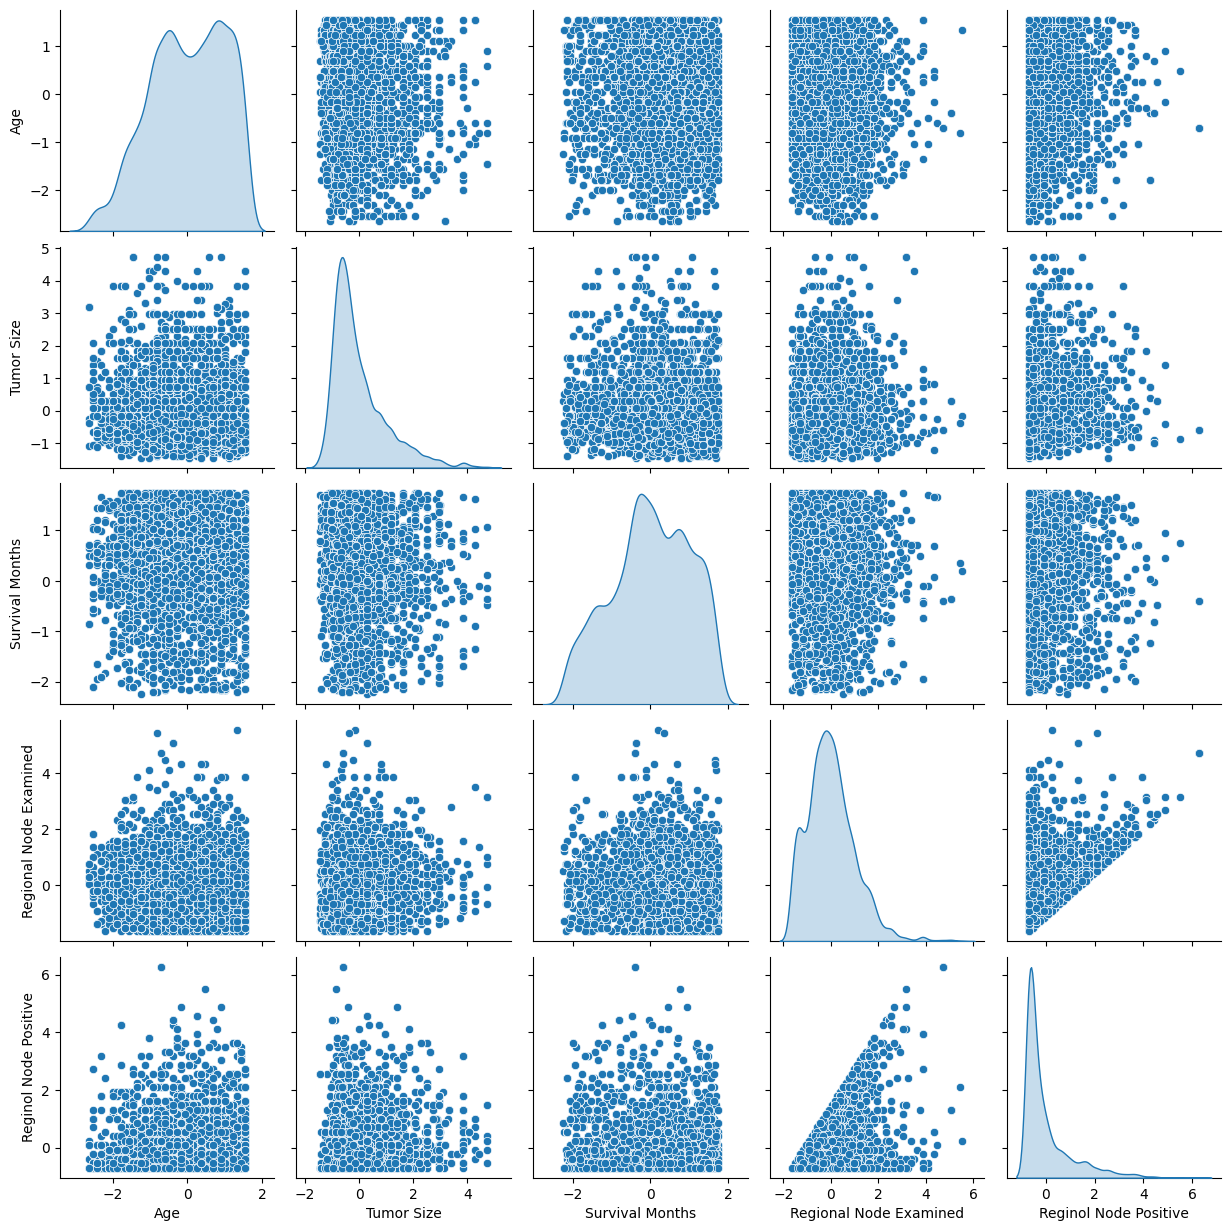

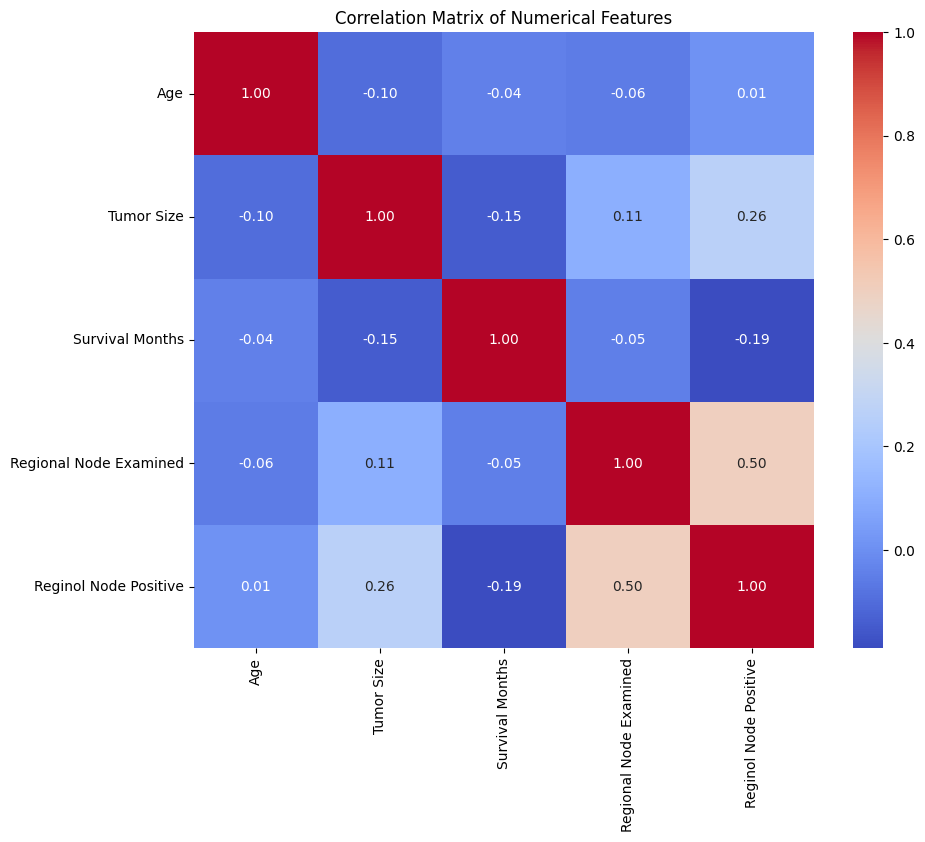

In [ ]:
#relationship between the numerical data
numerical_features = ["Age", "Tumor Size", "Survival Months", "Regional Node Examined", "Reginol Node Positive"]

# Create a pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.show()

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [ ]:
#relationship between the categorical data
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_cols = ['Grade', 'A Stage', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Race_White', 'Race_Black', 'Race_Other', 'Race_Unknown',
                    'Marital_Status_1', 'Marital_Status_2', 'Marital_Status_3', 'Marital_Status_4', 'Marital_Status_5',
                    'Progesterone_Negative', 'Progesterone_Positive', 'Estrogen_Negative', 'Estrogen_Positive']

for col1 in categorical_cols:
  for col2 in categorical_cols:
    if col1 != col2:
        cramers_v_value = cramers_v(df[col1], df[col2])
        print(f"Cramer's V between {col1} and {col2}: {cramers_v_value}")


Cramer's V between Grade and A Stage: nan
Cramer's V between Grade and T Stage : nan
Cramer's V between Grade and N Stage: nan
Cramer's V between Grade and 6th Stage: nan
Cramer's V between Grade and differentiate: nan
Cramer's V between Grade and Race_White: nan
Cramer's V between Grade and Race_Black: nan
Cramer's V between Grade and Race_Other: nan
Cramer's V between Grade and Race_Unknown: nan
Cramer's V between Grade and Marital_Status_1: nan
Cramer's V between Grade and Marital_Status_2: nan
Cramer's V between Grade and Marital_Status_3: nan
Cramer's V between Grade and Marital_Status_4: nan
Cramer's V between Grade and Marital_Status_5: nan
Cramer's V between Grade and Progesterone_Negative: nan
Cramer's V between Grade and Progesterone_Positive: nan
Cramer's V between Grade and Estrogen_Negative: nan
Cramer's V between Grade and Estrogen_Positive: nan
Cramer's V between A Stage and Grade: nan
Cramer's V between A Stage and T Stage : 0.34824753046122603
Cramer's V between A Stag

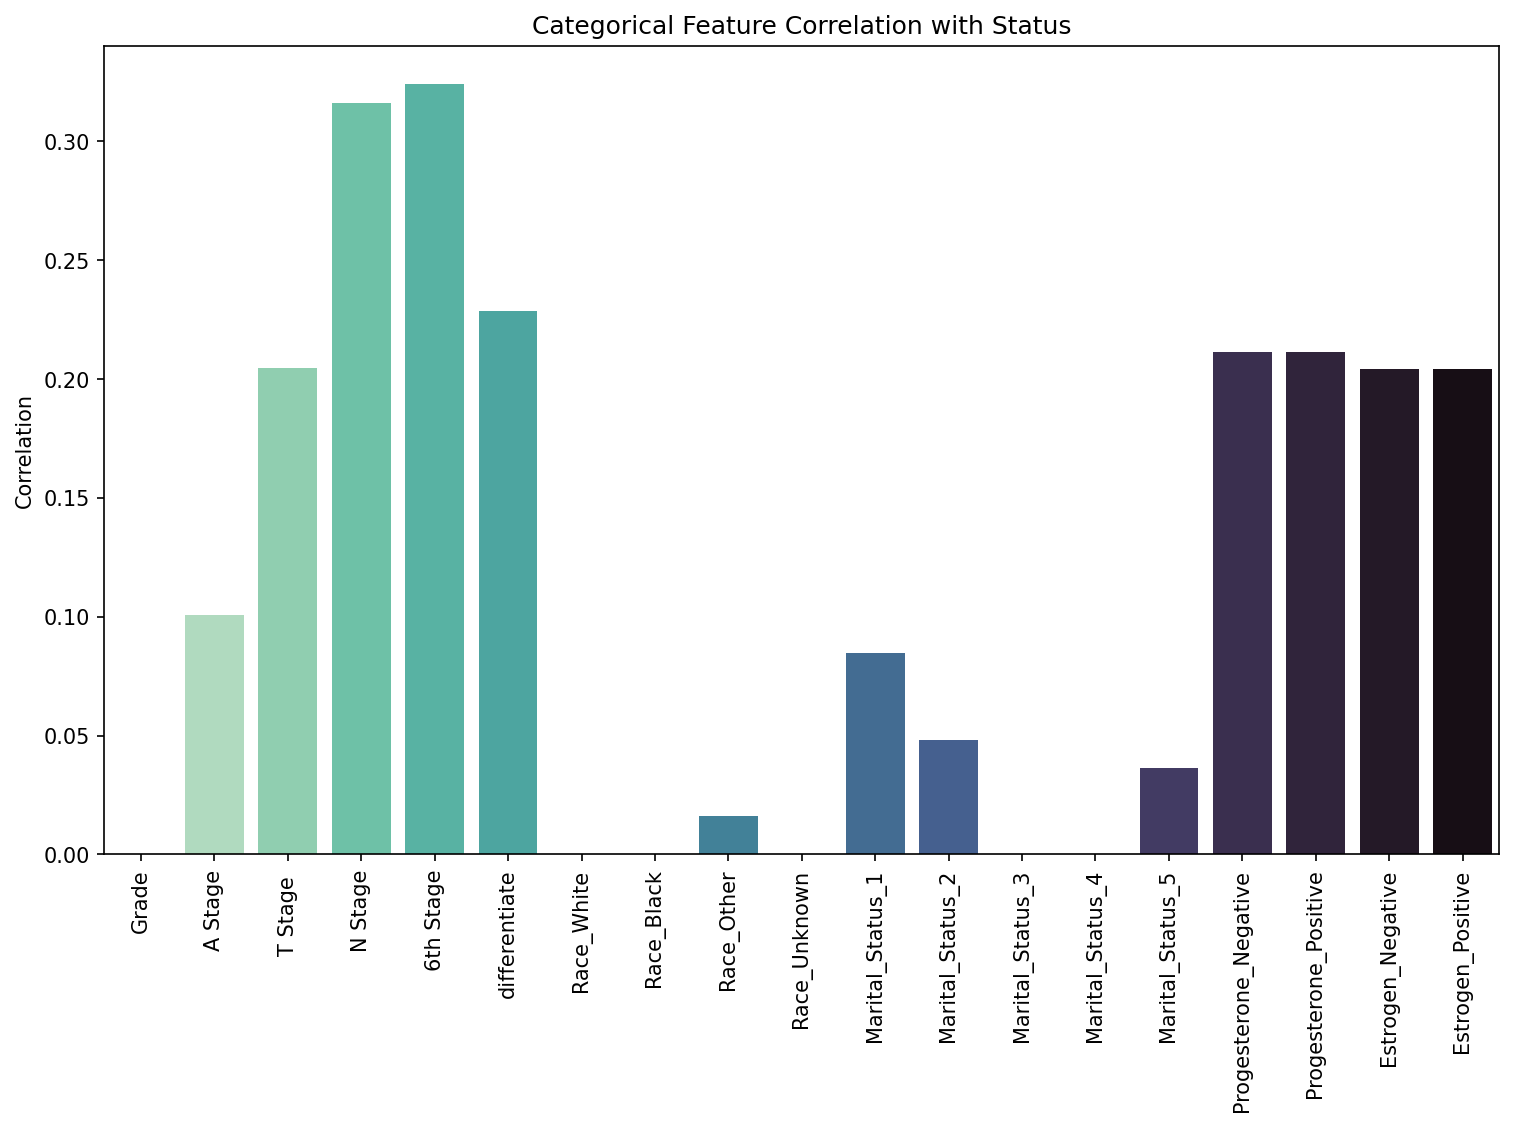

In [ ]:
from scipy.stats import chi2_contingency

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Example usage (replace with your categorical columns):
categorical_cols = ['Grade', 'A Stage', 'T Stage ', 'N Stage', '6th Stage', 'differentiate',
                    'Race_White', 'Race_Black', 'Race_Other', 'Race_Unknown',
                    'Marital_Status_1', 'Marital_Status_2', 'Marital_Status_3',
                    'Marital_Status_4', 'Marital_Status_5',
                    'Progesterone_Negative', 'Progesterone_Positive',
                    'Estrogen_Negative', 'Estrogen_Positive']


correlations = []
for col in categorical_cols:
    correlation = cramers_v(df[col], df['Status'])
    correlations.append({'Feature': col, 'Correlation': correlation})

correlation_df = pd.DataFrame(correlations)

# Create the barplot
plt.figure(figsize=(12, 7), dpi=150)
sns.barplot(data=correlation_df, x='Feature', y='Correlation', palette='mako_r')
plt.xticks(rotation=90)
plt.xlabel('')
plt.title("Categorical Feature Correlation with Status")
plt.show()


In [ ]:
df

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Regional Node Examined,Reginol Node Positive,...,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4,Marital_Status_5,Progesterone_Negative,Progesterone_Positive,Estrogen_Negative,Estrogen_Positive,Status
0,1.445820,1.0,1.0,1.0,3.0,0.0,2.0,-1.306458,1.113502,-0.697197,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,-0.490594,2.0,2.0,3.0,2.0,0.0,2.0,0.072586,-0.083861,-0.077264,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.370034,3.0,3.0,5.0,2.0,0.0,2.0,1.318174,-0.083861,0.232703,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,0.370034,1.0,1.0,1.0,3.0,0.0,2.0,-0.683664,-1.520697,-0.697197,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,-0.813330,2.0,1.0,2.0,3.0,0.0,2.0,0.339497,-1.400960,-0.697197,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,0.692770,2.0,1.0,2.0,2.0,0.0,2.0,-0.149841,0.993766,-0.542214,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6808,-0.275437,1.0,3.0,5.0,1.0,0.0,2.0,-0.817120,1.831920,3.797319,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6809,-1.136065,3.0,2.0,3.0,3.0,0.0,2.0,1.851997,-0.922015,-0.077264,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6810,-0.060280,2.0,3.0,5.0,3.0,0.0,2.0,-0.372267,-0.203597,1.162602,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# prompt: can you understand are my data normalized or not?

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your DataFrame is named 'df' and loaded
# Replace 'df' with your actual DataFrame variable name if different.

def check_normalization(df):
    """
    Checks if the data in the DataFrame appears to be normalized based on the presence of
    categorical features and numerical distributions. It uses statistical tests for both.

    Args:
      df: The pandas DataFrame to analyze.
    """
    numerical_features = df.select_dtypes(include=['number']).columns
    categorical_features = df.select_dtypes(include=['object', 'category']).columns

    print("Analysis of Numerical Features:")
    for col in numerical_features:
        if col != "Status":
            # Check for normality using a suitable test (e.g., Shapiro-Wilk test)
            statistic, p_value = shapiro(df[col])
            alpha = 0.05
            if p_value > alpha:
                print(f"{col}:  Data looks approximately normal (p-value = {p_value:.3f}).")
            else:
                print(f"{col}: Data does not appear to be normally distributed (p-value = {p_value:.3f}).")


    print("\nAnalysis of Categorical Features:")
    for col in categorical_features:
        # For categorical features, look for even distribution of categories
        print(f"Distribution of {col}:")
        print(df[col].value_counts(normalize=True) * 100)

        # Perform chi-squared test of independence against the "Status" column (if applicable).
        # This assumes "Status" is your target variable and is categorical
        if 'Status' in df.columns:
            contingency_table = pd.crosstab(df[col], df['Status'])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            alpha = 0.05
            print(f"Chi-square test with 'Status': p-value = {p_value:.3f}")
            if p_value < alpha:
                print(f"Significant association between {col} and 'Status'.")
            else:
                print(f"No significant association between {col} and 'Status'.")

check_normalization(df)


Analysis of Numerical Features:
Age: Data does not appear to be normally distributed (p-value = 0.000).
T Stage : Data does not appear to be normally distributed (p-value = 0.000).
N Stage: Data does not appear to be normally distributed (p-value = 0.000).
6th Stage: Data does not appear to be normally distributed (p-value = 0.000).
differentiate: Data does not appear to be normally distributed (p-value = 0.000).
Grade:  Data looks approximately normal (p-value = 1.000).
A Stage: Data does not appear to be normally distributed (p-value = 0.000).
Tumor Size: Data does not appear to be normally distributed (p-value = 0.000).
Regional Node Examined: Data does not appear to be normally distributed (p-value = 0.000).
Reginol Node Positive: Data does not appear to be normally distributed (p-value = 0.000).
Survival Months: Data does not appear to be normally distributed (p-value = 0.000).
Race_White: Data does not appear to be normally distributed (p-value = 0.000).
Race_Black: Data does not

In [ ]:

# spliting to x, y
X = df_standardized.drop(columns=["Status"])
y = df_standardized["Status"]

#deviding to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 📌 Logistic Regression**
#log_model = LogisticRegression()
#log_model.fit(X_train, y_train)
#y_pred_log = log_model.predict(X_test)

#print("📌 **Logistic Regression:**")
#print("Accuracy:", accuracy_score(y_test, y_pred_log))
#print(classification_report(y_test, y_pred_log))


In [ ]:
# Identify outliers in numerical features (for analysis only)
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numerical_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

for col in numerical_cols:
    outliers = find_outliers_iqr(df[col])
    num_outliers = len(outliers)
    print(f"Outliers in {col}: {num_outliers}")
    #print(f"Outlier Values in {col}:\n{outliers}\n")


Outliers in Age: 0
Outliers in Tumor Size: 398
Outliers in Regional Node Examined: 145
Outliers in Reginol Node Positive: 543
Outliers in Survival Months: 0


In [ ]:

# 📌 ** Random Forest**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n📌 **Random Forest:**")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



📌 **Random Forest:**
Accuracy: 0.9677182685253118
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       682
         1.0       1.00      0.94      0.97       681

    accuracy                           0.97      1363
   macro avg       0.97      0.97      0.97      1363
weighted avg       0.97      0.97      0.97      1363



In [ ]:
from sklearn.preprocessing import MinMaxScaler

ordinal_cols = ['T Stage ', 'N Stage', 'Grade', '6th Stage', 'A Stage']
scaler = MinMaxScaler()
df[ordinal_cols] = scaler.fit_transform(df[ordinal_cols])

In [ ]:
# 📌 Logistic Regression**
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("📌 **Logistic Regression:**")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


📌 **Logistic Regression:**
Accuracy: 0.7820983125458547
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       682
         1.0       0.78      0.79      0.78       681

    accuracy                           0.78      1363
   macro avg       0.78      0.78      0.78      1363
weighted avg       0.78      0.78      0.78      1363



In [ ]:
# Identify outliers in numerical features (for analysis only)
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numerical_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

for col in numerical_cols:
    outliers = find_outliers_iqr(df_resampled[col])  # Use df_resampled instead of df
    num_outliers = len(outliers)
    print(f"Outliers in {col} after resampling: {num_outliers}")
    # print(f"Outlier Values in {col}:\n{outliers}\n")


Outliers in Age after resampling: 0
Outliers in Tumor Size after resampling: 389
Outliers in Regional Node Examined after resampling: 145
Outliers in Reginol Node Positive after resampling: 543
Outliers in Survival Months after resampling: 0


In [ ]:
#compare my these two models together

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def compare_models(y_true, y_pred_log, y_pred_rf):

  results = {
      'Model': ['Logistic Regression', 'Random Forest'],
      'Accuracy': [accuracy_score(y_true, y_pred_log), accuracy_score(y_true, y_pred_rf)],
      'Precision': [precision_score(y_true, y_pred_log), precision_score(y_true, y_pred_rf)],
      'Recall': [recall_score(y_true, y_pred_log), recall_score(y_true, y_pred_rf)],
      'F1-Score': [f1_score(y_true, y_pred_log), f1_score(y_true, y_pred_rf)],
      # Add more metrics as needed (e.g., AUC, specificity, etc.)
  }

  df_results = pd.DataFrame(results)
  display(df_results)


# Example usage:
compare_models(y_test, y_pred_log, y_pred_rf)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.782098,0.77907,0.787078,0.783053
1,Random Forest,0.967718,1.00000,0.935389,0.966616
